# Домашняя работа №1

In [5]:
import cv2
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
def plot_one_image(image: np.ndarray) -> None:
    """
    Отобразить изображение с помощью matplotlib.
    Вспомогательная функция.
    
    :param image: изображение для отображения
    :return: None
    """
    
    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    axs.imshow(image)
    axs.axis('off')
    plt.plot()

# Задача №1 - Лабиринт

Реализуйте алгоритм поиска выхода из лабиринта по растровому изобажению.
Вам нужно написать код, который будет находить путь (координаты пикселей) от заданного входа сверху до выхода снизу.

Отрисуйте получившийся маршрут на карте с помощью функции ```plot_maze_path(img, coords)``` или воспользуйтесь вам известным графическим инструментом.

__Input:__

Изображение лабиринта в кодировке $RGB$.

Все карты лежат на [яндекс-диске](https://yadi.sk/d/qEWVZk2picDdZw)

__Ouput:__

Массив координат пути через лабиринт в виде ```(np.array(x), np.array(y))```. 

Оценивается __каждое__ успешное решение лабиринта.
Пример решенной задачи.<img src="https://b.radikal.ru/b22/1906/56/df991f2221a7.png" width="300">

In [7]:
from task_1 import find_way_from_maze

In [8]:
def find_enter(image, size):
    sizex = image.shape[0]
    sizey = image[0].shape[0]
    x_start,y_start,x_end,y_end = 0,0,0,0
    for i in range(sizex):
        if (image[i][0].tolist() == [255,255,255]):
            x_start = i
            y_start = 0
            for j in range(sizey):
                if (image[0][j].tolist() == [255,255,255]):
                    x_end = 0
                    y_end = j
                    return [x_start,y_start,x_end,y_end]
            for j in range(sizey):
                if (image[sizex-1][j].tolist() == [255,255,255]):
                    x_end = sizex-1
                    y_end = j
                    return [x_start,y_start,x_end,y_end]
            for j in range(sizex):
                if (image[j][sizey-1].tolist() == [255,255,255]):
                    x_end = j
                    y_end = sizey-1
                    return [x_start,y_start,x_end,y_end]
    for i in range(sizex):
        if (image[0][i].tolist() == [255,255,255]):
            x_start = 0
            y_start = i
            for j in range(sizex):
                if (image[j][0].tolist() == [255,255,255]):
                    x_end = j
                    y_end = 0
                    return [x_start,y_start,x_end,y_end]
            for j in range(sizey):
                if (image[size-1][j].tolist() == [255,255,255]):
                    x_end = sizex-1
                    y_end = j
                    return [x_start,y_start,x_end,y_end]
            for j in range(sizex):
                if (image[j][sizey-1].tolist() == [255,255,255]):
                    x_end = j
                    y_end = sizey-1
                    return [x_start,y_start,x_end,y_end]

In [9]:
def plot_maze_path(image: np.ndarray, coords: tuple) -> np.ndarray:
    """
    Нарисовать путь через лабиринт на изображении. 
    Вспомогательная функция.
     
    :param image: изображение лабиринта
    :param coords: координаты пути через лабиринт типа (x, y) где x и y - массивы координат точек
    :return img_wpath: исходное изображение с отрисованными координатами 
    """
    sizex = image.shape[0]
    sizey = image[0].shape[0]
    g = []
    for i in range(image.shape[0]):
        g.append([])
        for j in range(image[0].shape[0]):
            g[-1].append(0)
    coord = find_enter(test_image,sizex)#begin and end
    g[coord[0]][coord[1]] = 1
    k = 0
    while(g[coord[2]][coord[3]] == 0):
    #while(0):
        k+=1
        for i in range(sizex):
            for j in range(sizey):
                if g[i][j] == k:
                    if i>0 and g[i-1][j] == 0 and image[i-1][j].tolist() == [255,255,255]:
                        g[i-1][j] = k + 1
                    if j>0 and g[i][j-1] == 0 and image[i][j-1].tolist() == [255,255,255]:
                        g[i][j-1] = k + 1
                    if i<sizex-1 and g[i+1][j] == 0 and image[i+1][j].tolist() == [255,255,255]:
                        g[i+1][j] = k + 1
                    if j<sizey-1 and g[i][j+1] == 0 and image[i][j+1].tolist() == [255,255,255]:
                        g[i][j+1] = k + 1
                     
    i,j = coord[2],coord[3]
    k = g[coord[2]][coord[3]]
    print(k)
    path = [(i,j)]
    while k > 1:
        if i > 0 and g[i - 1][j] == k-1:
            i, j = i-1, j
            path.append((i, j))
            k-=1
        elif j > 0 and g[i][j - 1] == k-1:
            i, j = i, j-1
            path.append((i, j))
            k-=1
        elif i < sizex - 1 and g[i + 1][j] == k-1:
            i, j = i+1, j
            path.append((i, j))
            k-=1
        elif j < sizey - 1 and g[i][j + 1] == k-1:
            i, j = i, j+1
            path.append((i, j))
            k -= 1
    
    path.reverse()
    while len(path) > 0:
        i,j = path[len(path)-1][0],path[len(path)-1][1]
        image[i][j] = (100,200,100)
        path.pop()
    #f,ax = plt.subplots(figsize = [12,10])
    #ax.imshow(image)
    plot_one_image(image)

Загрузим тестовое изображение и отобразим его.

1172


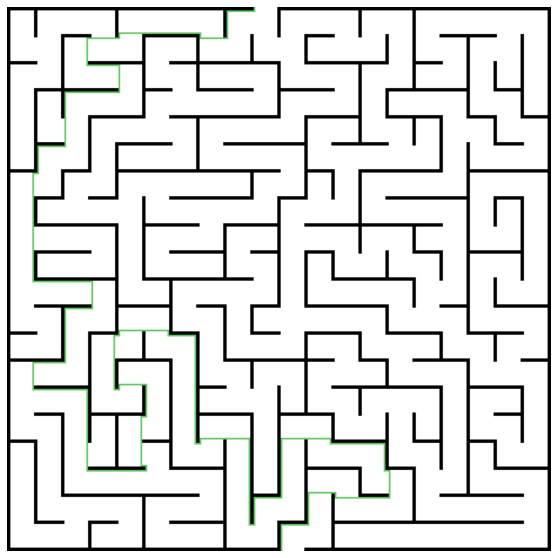

In [420]:
test_image = cv2.imread('task_1/maze1.png')  # загрузить тестовую картинку
plot_maze_path(test_image,())
#plt.imshow(test_image)

Теперь ваша задача реализовать функцию ```plot_maze_path``` в ```task_1.py``` для того, чтобы найти координаты пути через лабиринт.

In [11]:
#way_coords = find_way_from_maze(test_image)  # вычислить координаты пути через лабиринт

#image_with_way = plot_maze_path(test_image, way_coords)

#plot_one_image(image_with_way)

# Задача №2 - Пробки в городе

Требуется написать программу, которая на вход принимает картинку, на которой схематически изображена машинка на дороге с $N$ полосами и препятствия на полосах. Соответствующие объекты обозначены цветами, которые сохраняются на всех изображениях. 

Результатом работы программы является номер полосы, на которую нужно перестроиться или сообщение о том, что перестраиваться не нужно.

**Примечание: номер дороги считается слева направо, отсчет начинается с нуля.**

Примеры изображений:
<table><tr>
    <td> <img src="https://i.ibb.co/8z84sJG/image_00.jpg" alt="Drawing" style="width: 200px;"/> </td>
    <td> <img src="https://i.ibb.co/Z6m4XFz/image_01.jpg" alt="Drawing" style="width: 200px;"/> </td>
</tr></table>

In [12]:
#from task_2 import find_road_number

In [13]:
def find_road_number(image):
    be = []
    be.append([0,0])
    count = 0
    j=0
    while(j<image[0].shape[0]):
        for i in range(int(image.shape[0] / 2)):
            if image[i][j] < 10:# and image[i][j] > 3:
                begin = j
                while(1):
                    j+=1
                    if image[i][j] > 10:
                        end = j
                        if (end-begin < 10):
                            break
                        count=count+1
                        be.append([begin,end])
                        break
        j+=1
        
    #print(count)
    for i in range(1,len(be)):
        if be[i][0]-be[i-1][1] > int(image.shape[0] / (count+1)):
            #print(i)
            return i
    return 

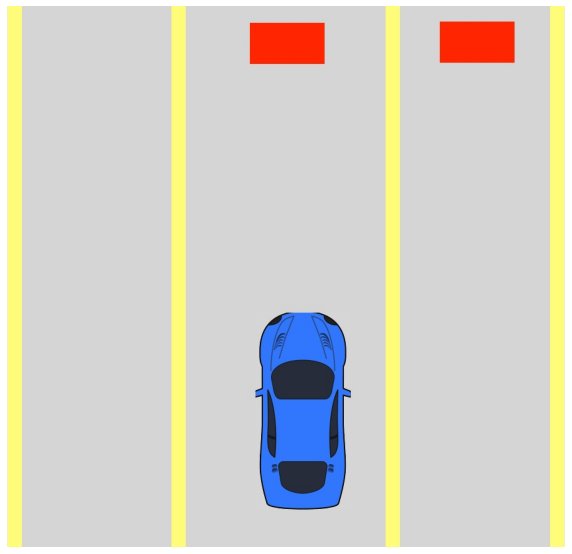

In [423]:
image = cv2.imread('task_2/image_02.jpg')
r = image[:, :, 0].copy()
r[(r >= 90) & (r <= 100)] = 0
#find_road_number(r)
plot_one_image(image)

In [424]:
road_number = find_road_number(r)

print(f'Нужно перестроиться на дорогу номер {road_number}')

Нужно перестроиться на дорогу номер 1


# Задача №3 - Аффинные преобразования

## Задача №3.1 - Поверни изображение

Реализуйте функцию, которая поворачивает изображение вокруг заданной точки на заданный угол ($0^\circ-360^\circ$) и преобразует размер изображения, чтобы оно не обрезалось после поворота.

In [425]:
#from task_3 import rotate

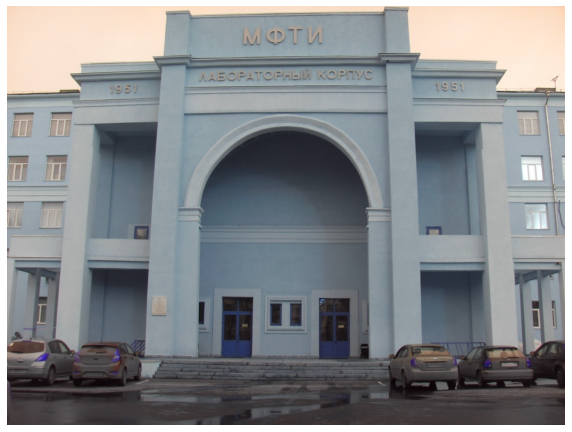

In [426]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [437]:
def rotate_image(image, angle, point):
    x,y = image[0].shape[0], image.shape[0]
    image_center = tuple(np.array([x,y]) / 2)

    R_mat = np.vstack([cv2.getRotationMatrix2D(image_center, angle, 1.0), [0, 0, 1]])

    R_mat_s = np.matrix(R_mat[0:2, 0:2])

    R_coords = [
        (np.array([-x * 0.5,  y * 0.5]) * R_mat_s).A[0],
        (np.array([ x * 0.5,  y * 0.5]) * R_mat_s).A[0],
        (np.array([-x * 0.5, -y * 0.5]) * R_mat_s).A[0],
        (np.array([ x * 0.5, -y * 0.5]) * R_mat_s).A[0]
    ]

    x_coords = [pt[0] for pt in R_coords]
    y_coords = [pt[1] for pt in R_coords]
    right =  max([x for x in x_coords if x > 0])
    left = min([x for x in x_coords if x < 0])

    top = max([y for y in y_coords if y > 0])
    bot = min([y for y in y_coords if y < 0])

    new_size = (int(abs(right - left)),int(abs(top - bot)))

    T_mat = np.matrix([
        [1, 0, int(new_size[0] * 0.5 - x * 0.5)],
        [0, 1, int(new_size[1] * 0.5 - y * 0.5)],
        [0, 0, 1]
    ])

    A_mat = (np.matrix(T_mat) * np.matrix(R_mat))[0:2, :]

    image_rot = cv2.warpAffine(image,A_mat,new_size)

    return image_rot

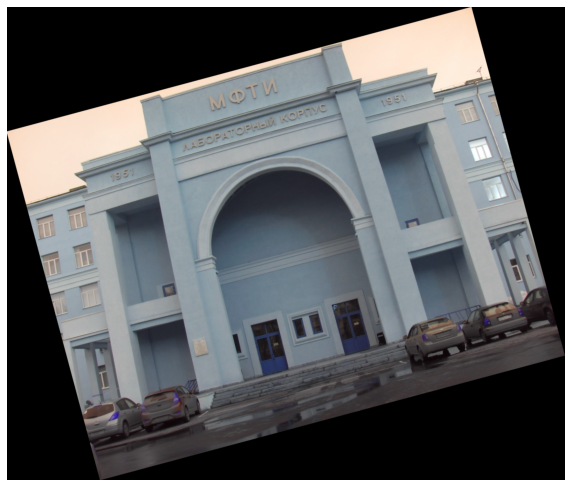

In [438]:
test_point = (200, 200)
test_angle = 15

transformed_image = rotate_image(test_image, test_angle, test_point)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

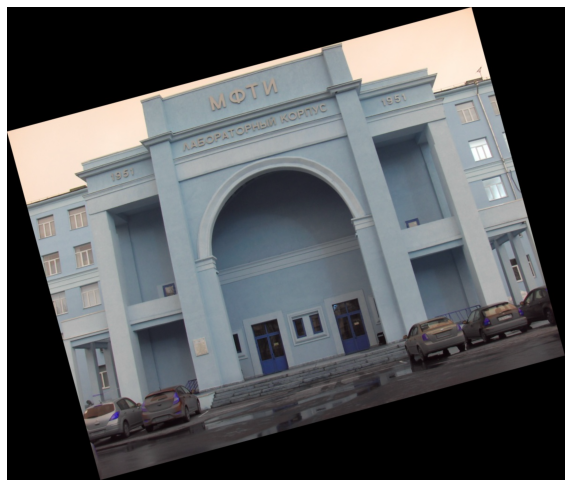

In [429]:
result_image = cv2.imread('task_3/lk_rotate.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)

## Задача №3.2 - Афинные преобразования

Реализуйте функцию, которая применяет афинное преобразование между заданными точками на исходном изображении и преобразует размер получившегося изображения, чтобы оно не обрезалось.

In [430]:
from task_3 import apply_warpAffine

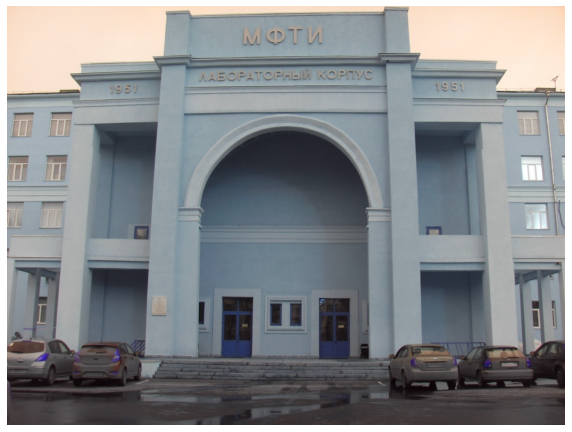

In [431]:
test_image = cv2.imread('task_3/lk.jpg')
test_image = cv2.cvtColor(test_image, cv2.COLOR_BGR2RGB)
plot_one_image(test_image)

In [439]:
def apply_warpAffine(image, point1, point2):
    x,y = image[0].shape[0], image.shape[0]
    R_mat = np.vstack([cv2.getAffineTransform(point1, point2), [0, 0, 1]])
    R_coords = [
        [R_mat @ [0, 0, 1]],
        [R_mat @ [0, y, 1]],
        [R_mat @ [x, 0, 1]],
        [R_mat @ [x, y, 1]]
    ]
    R_coords = [[rc[0][0],rc[0][1]] for rc in R_coords]
    x_coords = [pt[0] for pt in R_coords]
    y_coords = [pt[1] for pt in R_coords]
    y1 = max(abs(y_coords[3]-y_coords[0]),abs(y_coords[2]-y_coords[1]))
    x1 = max(abs(x_coords[3]-x_coords[0]),abs(x_coords[2]-x_coords[1]))
    xc = -min(x_coords)
    yc = -min(y_coords)
    T_mat = np.matrix([
        [1, 0, xc],
        [0, 1, yc],
        [0, 0, 1]
    ])
    A_mat = (np.matrix(T_mat) * np.matrix(R_mat))[0:2, :]
    image_rot = cv2.warpAffine(image,A_mat,(int(x1),int(y1)))
    return image_rot

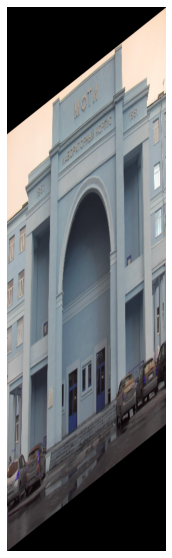

In [440]:
test_point_1 = np.float32([[50, 50], [400, 50], [50, 200]])
test_point_2 = np.float32([[100, 100], [200, 20], [100, 250]]) 

transformed_image = apply_warpAffine(test_image, test_point_1, test_point_2)
plot_one_image(transformed_image)

Проверьте как это должно было получиться

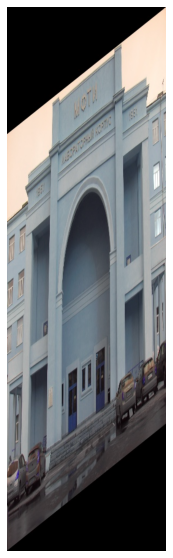

In [434]:
result_image = cv2.imread('task_3/lk_affine.jpg')
result_image = cv2.cvtColor(result_image, cv2.COLOR_BGR2RGB)
plot_one_image(result_image)